<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Blood%20Cell%20Images/blood1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7868e7671b27d01a285d3050517c08f19bb6a42e9c3096a5b3eddb52fb9e439e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import random
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
import zipfile
import io

In [ ]:
zip_file_url = 'https://github.com/Mohammad-H-Zahrawi/Challenges-Kaggle/raw/main/Blood%20Cell%20Images/blood-cell-images-based-classification.zip'
response = requests.get(zip_file_url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('/content/')

train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Blood%20Cell%20Images/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Blood%20Cell%20Images/test.csv')

In [ ]:
data_dir = pathlib.Path('/content/Images/Images')

list_images = os.listdir(data_dir)
image_numbers = []         #extracting images numbers
images_path = []           #extracting images pathes
for i in list_images:
    image_name = str(data_dir)+'/'+i
    image_numbers.append(int(image_name[-7:-4]))
    images_path.append(image_name)

#creating dataframe
images = pd.DataFrame(columns=['image_path','Image'])
images['image_path'] = images_path
images['Image'] = image_numbers
images.head(3)

train1 = pd.merge(train, images, on='Image')
test1 = pd.merge(test, images, on='Image')

folder_path = '/content/dataImages'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Directory '{folder_path}' created successfully")
else:
    print(f"Directory '{folder_path}' already exists")


for i in train1['Category'].unique():
    if not os.path.exists(folder_path+'/'+'train'+'/'+i):
        os.makedirs(folder_path+'/'+'train'+'/'+i)

if not os.path.exists(folder_path+'/'+'test'+'/'):
    os.makedirs(folder_path+'/'+'test'+'/')

import shutil
import os
for file in train1.iterrows():
    shutil.move(file[1][2] ,'/content/dataImages/train'+'/'+file[1][1] )

# for file in test1.iterrows():
#     shutil.move(file[1][1] ,'/content/dataImages/test/' )


Directory '/content/dataImages' created successfully


# Image Enhancement

In [ ]:
test1 = mpimg.imread('/content/dataImages/train/EOSINOPHIL/'+((random.sample(os.listdir('/content/dataImages/train/EOSINOPHIL/'),1))[0]))
test2 = mpimg.imread('/content/dataImages/train/LYMPHOCYTE/'+((random.sample(os.listdir('/content/dataImages/train/LYMPHOCYTE/'),1))[0]))
test3 = mpimg.imread('/content/dataImages/train/MONOCYTE/'+((random.sample(os.listdir('/content/dataImages/train/MONOCYTE/'),1))[0]))
test4 = mpimg.imread('/content/dataImages/train/NEUTROPHIL/'+((random.sample(os.listdir('/content/dataImages/train/NEUTROPHIL/'),1))[0]))


In [ ]:
test1.shape

(480, 640, 3)

array([[177, 176, 174, ..., 201, 199, 197],
       [176, 175, 173, ..., 201, 199, 197],
       [173, 172, 171, ..., 200, 198, 196],
       ...,
       [194, 193, 192, ..., 187, 181, 177],
       [196, 195, 193, ..., 188, 182, 177],
       [197, 196, 194, ..., 188, 182, 177]], dtype=uint8)
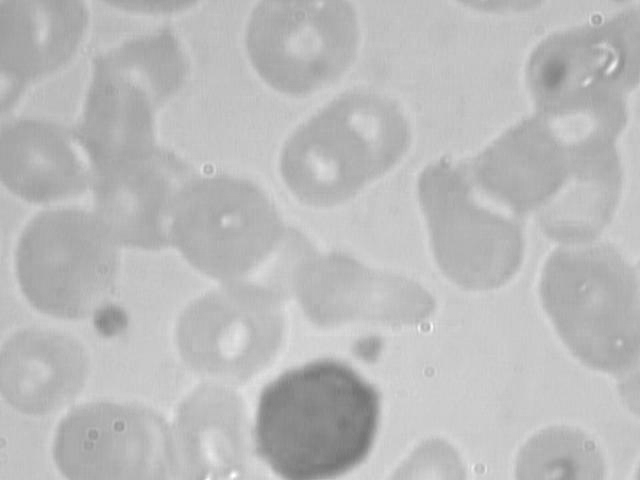

In [ ]:
test2[:,:, 0]

array([[165, 165, 163, ..., 196, 193, 191],
       [165, 164, 162, ..., 196, 193, 191],
       [164, 163, 162, ..., 197, 195, 193],
       ...,
       [179, 179, 180, ..., 157, 156, 156],
       [181, 182, 183, ..., 157, 156, 156],
       [183, 184, 185, ..., 158, 157, 157]], dtype=uint8)
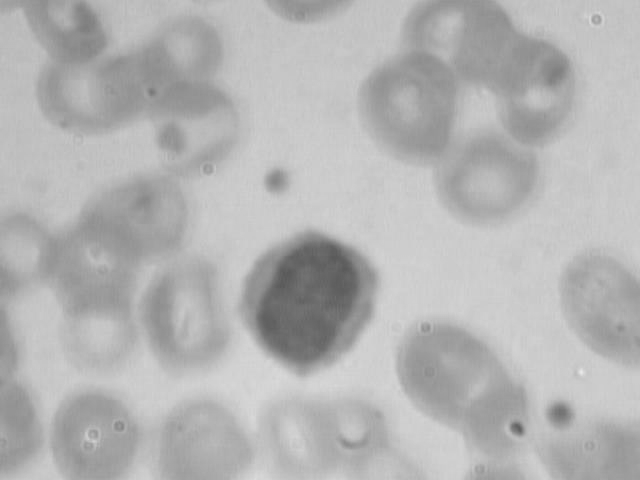

In [ ]:
test2[:,:, 1]

array([[153, 153, 153, ..., 192, 192, 190],
       [153, 152, 152, ..., 192, 192, 190],
       [153, 152, 151, ..., 193, 191, 189],
       ...,
       [167, 167, 171, ..., 167, 169, 169],
       [169, 170, 173, ..., 167, 169, 169],
       [171, 172, 175, ..., 168, 170, 170]], dtype=uint8)
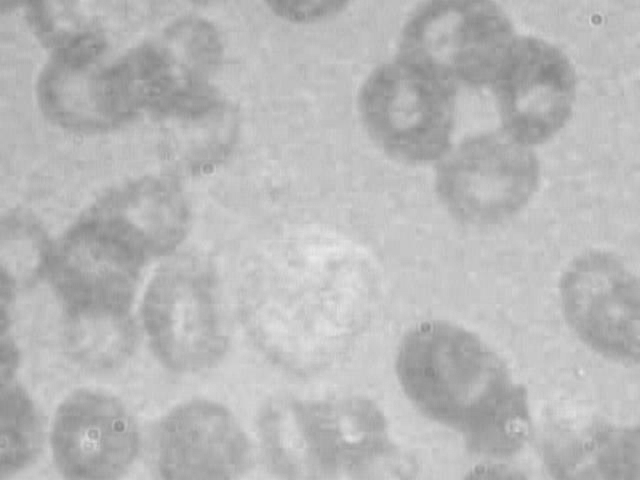

In [ ]:
test2[:,:, 2]

array([[[175, 165, 153],
        [175, 165, 153],
        [173, 163, 153],
        ...,
        [191, 196, 192],
        [189, 193, 192],
        [187, 191, 190]],

       [[175, 165, 153],
        [174, 164, 152],
        [172, 162, 152],
        ...,
        [191, 196, 192],
        [189, 193, 192],
        [187, 191, 190]],

       [[172, 164, 153],
        [171, 163, 152],
        [170, 162, 151],
        ...,
        [192, 197, 193],
        [190, 195, 191],
        [188, 193, 189]],

       ...,

       [[181, 179, 167],
        [181, 179, 167],
        [183, 180, 171],
        ...,
        [180, 157, 167],
        [180, 156, 169],
        [180, 156, 169]],

       [[181, 181, 169],
        [182, 182, 170],
        [183, 183, 173],
        ...,
        [180, 157, 167],
        [180, 156, 169],
        [180, 156, 169]],

       [[183, 183, 171],
        [184, 184, 172],
        [185, 185, 175],
        ...,
        [181, 158, 168],
        [181, 157, 170],
        [181, 157, 170]]], dtype=uint8)
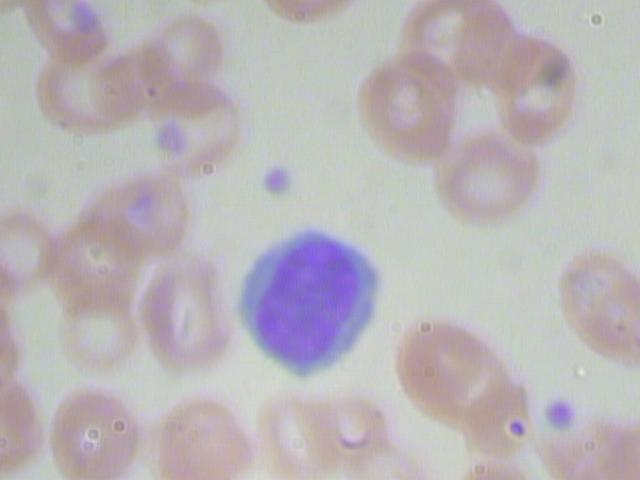

In [ ]:
test2[:,:, :]

## equalization

In [ ]:
def explore_images(func):

  fig , ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,12))

  ax[0,0].imshow(test1)
  ax[0,0].axis(False)
  ax[0,0].title.set_text('Original')

  ax[1,0].imshow(func(test1))
  ax[1,0].axis(False)
  ax[1,0].title.set_text('after')

  ax[0,1].imshow(test2)
  ax[0,1].axis(False)
  ax[0,1].title.set_text('Original')

  ax[1,1].imshow(func(test2))
  ax[1,1].axis(False)
  ax[1,1].title.set_text('after')

  ax[0,2].imshow(test3)
  ax[0,2].axis(False)
  ax[0,2].title.set_text('Original')

  ax[1,2].imshow(func(test3))
  ax[1,2].axis(False)
  ax[1,2].title.set_text('after')


  plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [ ]:

def png_jpg(img):
  if img.dtype in ['float32','float64']:
    img = np.multiply(img, 255, out=img, casting='unsafe')

    img = img.astype(np.uint8)
  else:
    img=img
  return img

In [ ]:

def equalizer(img):
  img = png_jpg(img)
  if len(img.shape)>2:

    if img.shape[2]==3:
      img = img.astype(np.uint8)
      R, G, B = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      equ = cv2.merge((output1_R, output1_G, output1_B))

    elif img.shape[2]==4:
      img = img.astype(np.uint8)
      R, G, B , other = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      output1_other = cv2.equalizeHist(other)
      equ = cv2.merge((output1_R, output1_G, output1_B,output1_other))

    else:
      img = img.astype(np.uint8)
      equ = cv2.equalizeHist(img)
  else:
    img = img.astype(np.uint8)
    equ = cv2.equalizeHist(img)

  return equ/255.

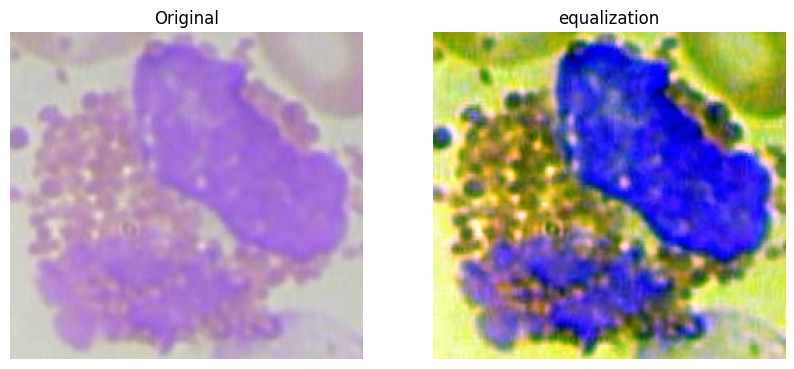

In [ ]:
iii = '/content/BloodImage_00352.jpg'
threeChannel_Image = mpimg.imread(iii)
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))

ax1.imshow(threeChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(threeChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

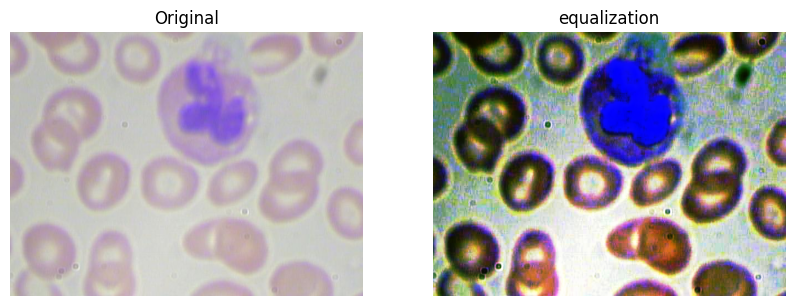

In [ ]:
threeChannel_Image = mpimg.imread('/content/dataImages/train/NEUTROPHIL/BloodImage_00172.jpg')
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))

ax1.imshow(threeChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(threeChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

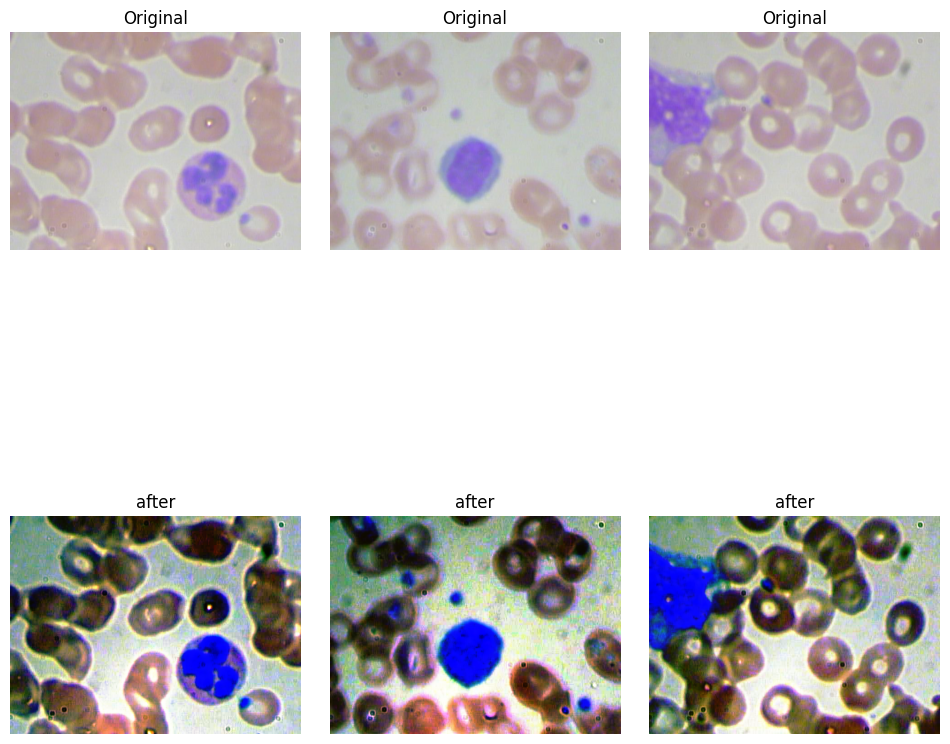

In [ ]:
explore_images(equalizer)

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [ ]:
def clahe(img):
  img = png_jpg(img)
  if len(img.shape)>2:
    if img.shape[2] ==4:

      R, G, B , other = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      output1_other = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(other)
      clah = cv2.merge((output1_R, output1_G, output1_B, output1_other))

    elif img.shape[2] ==3:
      R, G, B  = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      clah = cv2.merge((output1_R, output1_G, output1_B))

    else:
      clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  else:
    clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  return clah

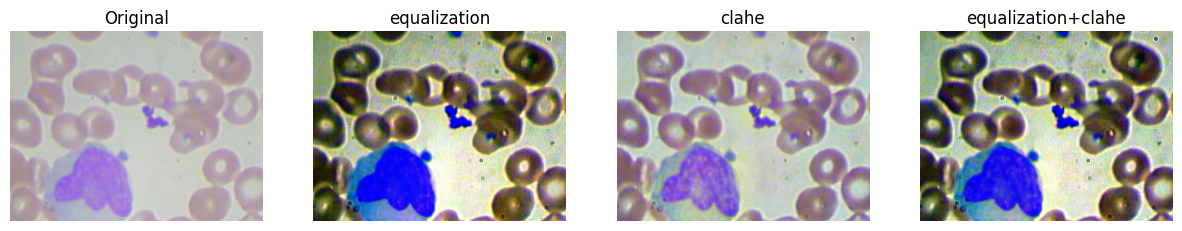

In [ ]:
test4 = mpimg.imread('/content/dataImages/train/MONOCYTE/BloodImage_00312.jpg')
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,15))

ax1.imshow(test4)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(test4))
ax2.axis(False)
ax2.title.set_text('equalization')

ax3.imshow(clahe(test4))
ax3.axis(False)
ax3.title.set_text('clahe')

ax4.imshow(clahe(equalizer(test4)))
ax4.axis(False)
ax4.title.set_text('equalization+clahe')

In [ ]:

def denoising(img):
  if len(img.shape)>2:
    if img.shape[2]==3:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img),None,10,10,7,21)
    elif img.shape[2]==4:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img[:,:,:3]),None,10,10,7,21)
    else:
      dst = cv2.fastNlMeansDenoising(png_jpg(img))
  else:
    dst = cv2.fastNlMeansDenoising(png_jpg(img))
  return dst

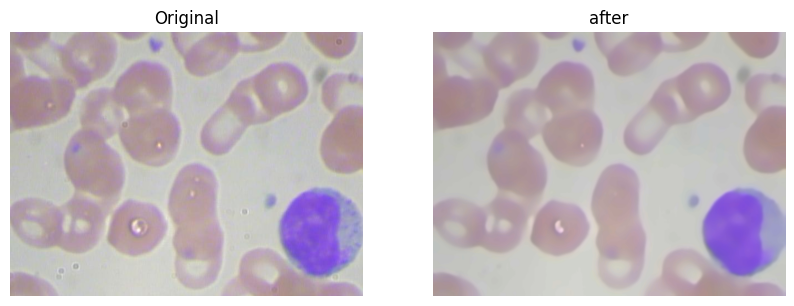

In [ ]:
file = mpimg.imread('/content/dataImages/train/LYMPHOCYTE/BloodImage_00206.jpg')
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))
example=(denoising(file))
ax1.imshow(file)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(example)
ax2.axis(False)
ax2.title.set_text('after')

### log law trans

In [ ]:
def log_low_trasformer(img):

  R, G, B  = cv2.split(img)
  output1_R = cv2.pow(R.astype(np.float32),1.1)
  output1_G = cv2.pow(G.astype(np.float32),1.1)
  output1_B = cv2.pow(B.astype(np.float32),1.1)
  im = cv2.merge((output1_R, output1_G, output1_B))
  im = im.astype(np.uint8)

  return im

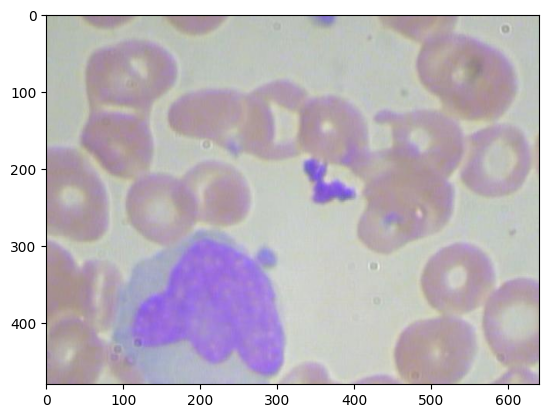

In [ ]:
plt.imshow(test3)


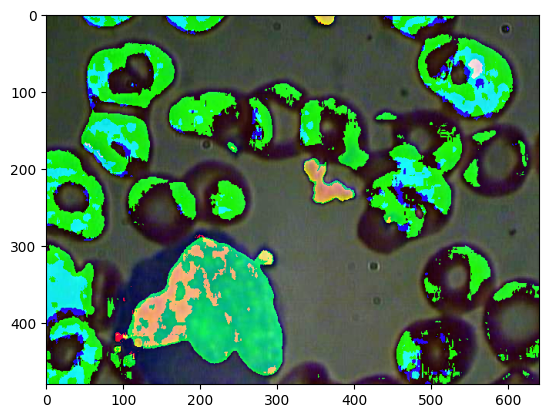

In [ ]:
plt.imshow(log_low_trasformer(test3))


# Continue

array([[[188, 172, 157],
        [189, 173, 158],
        [188, 172, 157],
        ...,
        [199, 196, 191],
        [197, 193, 190],
        [194, 190, 187]],

       [[190, 174, 159],
        [191, 175, 160],
        [190, 174, 159],
        ...,
        [201, 197, 194],
        [199, 195, 192],
        [197, 193, 190]],

       [[193, 177, 162],
        [193, 177, 162],
        [193, 177, 162],
        ...,
        [203, 199, 198],
        [201, 197, 196],
        [199, 195, 194]],

       ...,

       [[191, 202, 196],
        [190, 201, 195],
        [190, 201, 195],
        ...,
        [206, 205, 201],
        [207, 206, 201],
        [208, 207, 202]],

       [[191, 202, 196],
        [190, 201, 195],
        [190, 201, 195],
        ...,
        [209, 205, 202],
        [210, 207, 202],
        [211, 208, 203]],

       [[191, 202, 196],
        [190, 201, 195],
        [190, 201, 195],
        ...,
        [209, 205, 202],
        [210, 207, 202],
        [211, 208, 203]]], dtype=uint8)
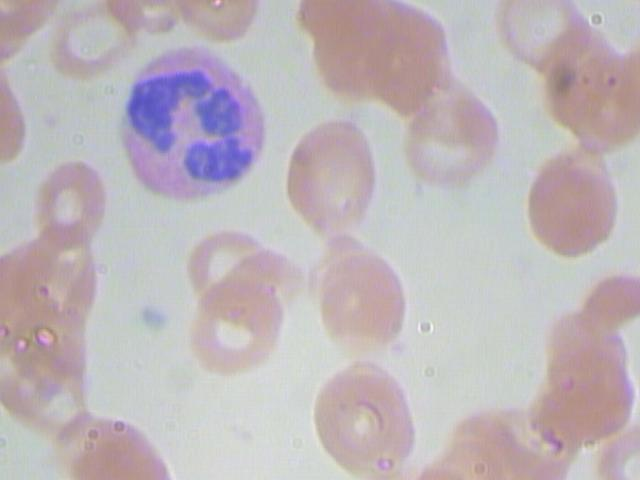

In [ ]:
test1 = mpimg.imread('/content/dataImages/train/EOSINOPHIL/BloodImage_00023.jpg')
test1

array([[157, 158, 157, ..., 191, 190, 187],
       [159, 160, 159, ..., 194, 192, 190],
       [162, 162, 162, ..., 198, 196, 194],
       ...,
       [196, 195, 195, ..., 201, 201, 202],
       [196, 195, 195, ..., 202, 202, 203],
       [196, 195, 195, ..., 202, 202, 203]], dtype=uint8)
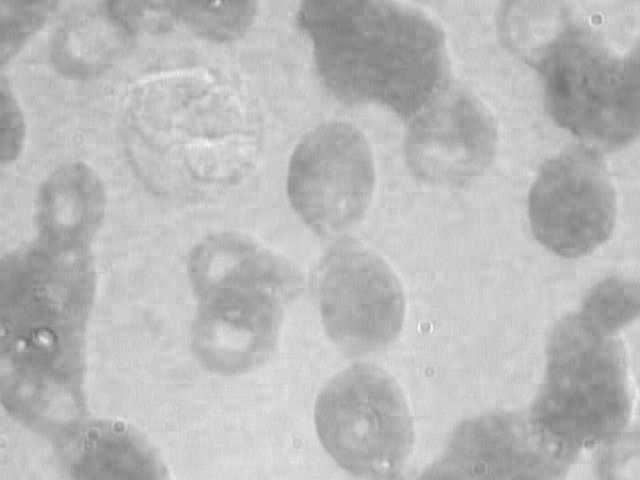

In [ ]:
test1[:, :, 2]

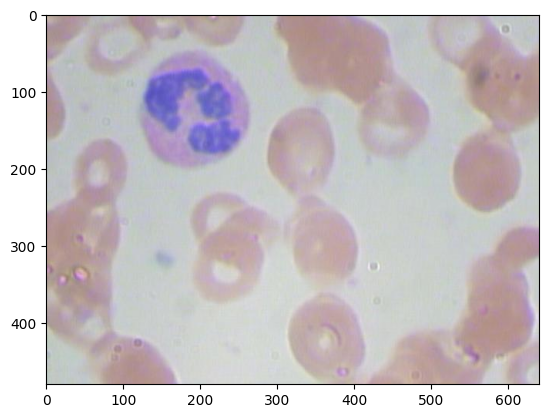

In [ ]:
plt.imshow(test1)

In [ ]:
import cv2

from google.colab.patches import cv2_imshow # Import the Colab patch

img = cv2.imread('/content/dataImages/train/EOSINOPHIL/BloodImage_00075.jpg')
new_size = (300,300 )
resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

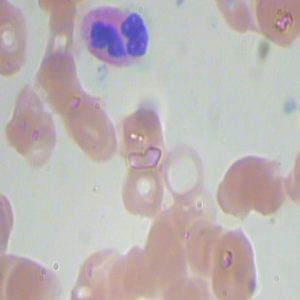

In [ ]:
cv2_imshow(resized_img)

array([[[138, 138, 162],
        [144, 139, 164],
        [153, 138, 165],
        ...,
        [144, 137, 174],
        [146, 138, 175],
        [147, 139, 176]],

       [[139, 138, 163],
        [144, 139, 164],
        [152, 139, 165],
        ...,
        [142, 138, 174],
        [143, 139, 175],
        [144, 139, 176]],

       [[139, 138, 164],
        [143, 139, 165],
        [150, 140, 166],
        ...,
        [139, 138, 174],
        [139, 138, 174],
        [140, 139, 175]],

       ...,

       [[144, 155, 177],
        [147, 158, 180],
        [150, 161, 183],
        ...,
        [198, 206, 199],
        [197, 208, 200],
        [194, 205, 197]],

       [[144, 155, 177],
        [147, 158, 180],
        [149, 160, 182],
        ...,
        [198, 206, 199],
        [197, 208, 200],
        [194, 205, 197]],

       [[144, 155, 177],
        [146, 158, 180],
        [148, 159, 181],
        ...,
        [198, 206, 199],
        [197, 208, 200],
        [194, 205, 197]]], dtype=uint8)
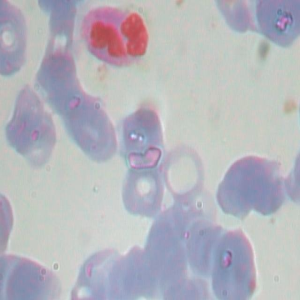

In [ ]:
resized_img

array([[[162, 138, 138],
        [164, 139, 144],
        [165, 138, 153],
        ...,
        [174, 137, 144],
        [175, 138, 146],
        [176, 139, 147]],

       [[163, 138, 139],
        [164, 139, 144],
        [165, 139, 152],
        ...,
        [174, 138, 142],
        [175, 139, 143],
        [176, 139, 144]],

       [[164, 138, 139],
        [165, 139, 143],
        [166, 140, 150],
        ...,
        [174, 138, 139],
        [174, 138, 139],
        [175, 139, 140]],

       ...,

       [[177, 155, 144],
        [180, 158, 147],
        [183, 161, 150],
        ...,
        [199, 206, 198],
        [200, 208, 197],
        [197, 205, 194]],

       [[177, 155, 144],
        [180, 158, 147],
        [182, 160, 149],
        ...,
        [199, 206, 198],
        [200, 208, 197],
        [197, 205, 194]],

       [[177, 155, 144],
        [180, 158, 146],
        [181, 159, 148],
        ...,
        [199, 206, 198],
        [200, 208, 197],
        [197, 205, 194]]], dtype=uint8)
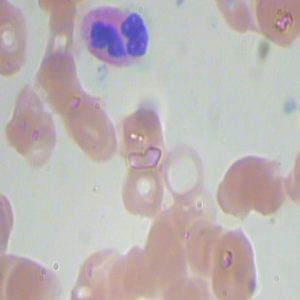

In [ ]:
imgg = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
imgg

array([[138, 139, 138, ..., 137, 138, 139],
       [138, 139, 139, ..., 138, 139, 139],
       [138, 139, 140, ..., 138, 138, 139],
       ...,
       [155, 158, 161, ..., 206, 208, 205],
       [155, 158, 160, ..., 206, 208, 205],
       [155, 158, 159, ..., 206, 208, 205]], dtype=uint8)
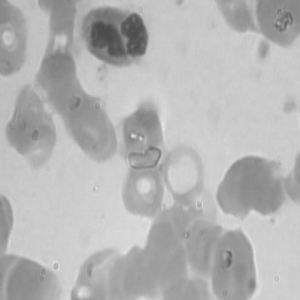

In [ ]:
imgg[:,:, 1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
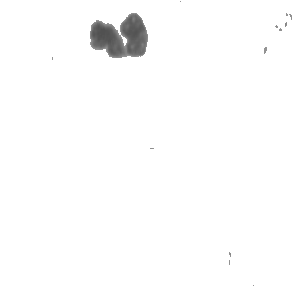

In [ ]:
result = np.where(imgg[:,:, 0] > 150, 255, imgg[:,:, 0])
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
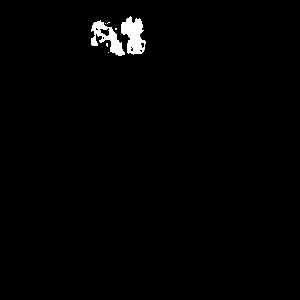

In [ ]:
lower_red = np.array([75, 75, 175])
upper_red = np.array([220, 110, 200])
mask = cv2.inRange(imgg, lower_red, upper_red)
b_pixel_count=cv2.countNonZero(mask)

mask